In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from IPython.display import display
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Connect to SQLite Database
conn = sqlite3.connect('nfl.db')
cursor = conn.cursor()

# Load data from SQLite database tables into pandas DataFrames
teams_df = pd.read_sql_query("SELECT * FROM Teams", conn)
games_df = pd.read_sql_query("SELECT * FROM Games", conn)
playerstats_df = pd.read_sql_query("SELECT * FROM PlayerStats", conn)

# Close the connection
conn.close()

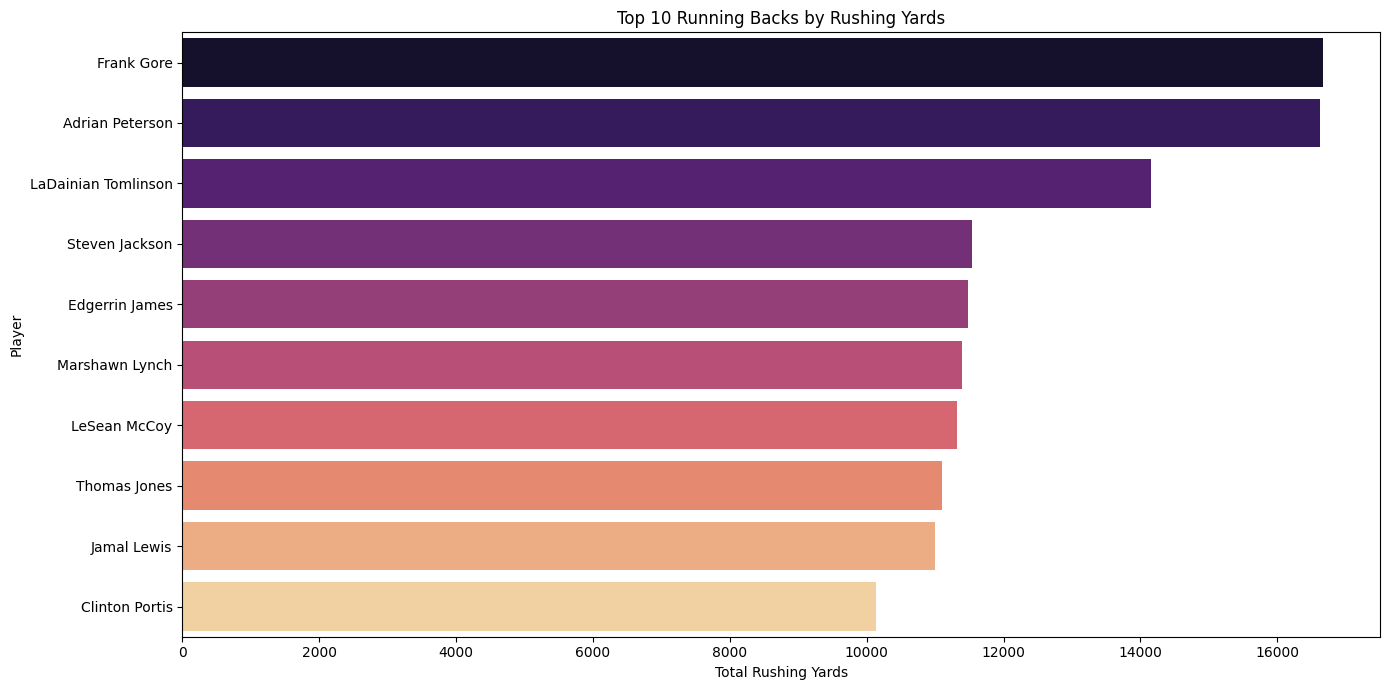

In [4]:
# Top Running Backs Performance
top_rbs = playerstats_df[playerstats_df['position'] == 'RB'].groupby('player_display_name').agg({
    'rushing_yards': 'sum', 'rushing_tds': 'sum'
}).sort_values(by='rushing_yards', ascending=False).head(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='rushing_yards', y='player_display_name', data=top_rbs, hue='player_display_name', dodge=False, palette='magma', legend=False)
plt.title('Top 10 Running Backs by Rushing Yards')
plt.xlabel('Total Rushing Yards')
plt.ylabel('Player')
plt.tight_layout()

# Save visualization
plt.show()

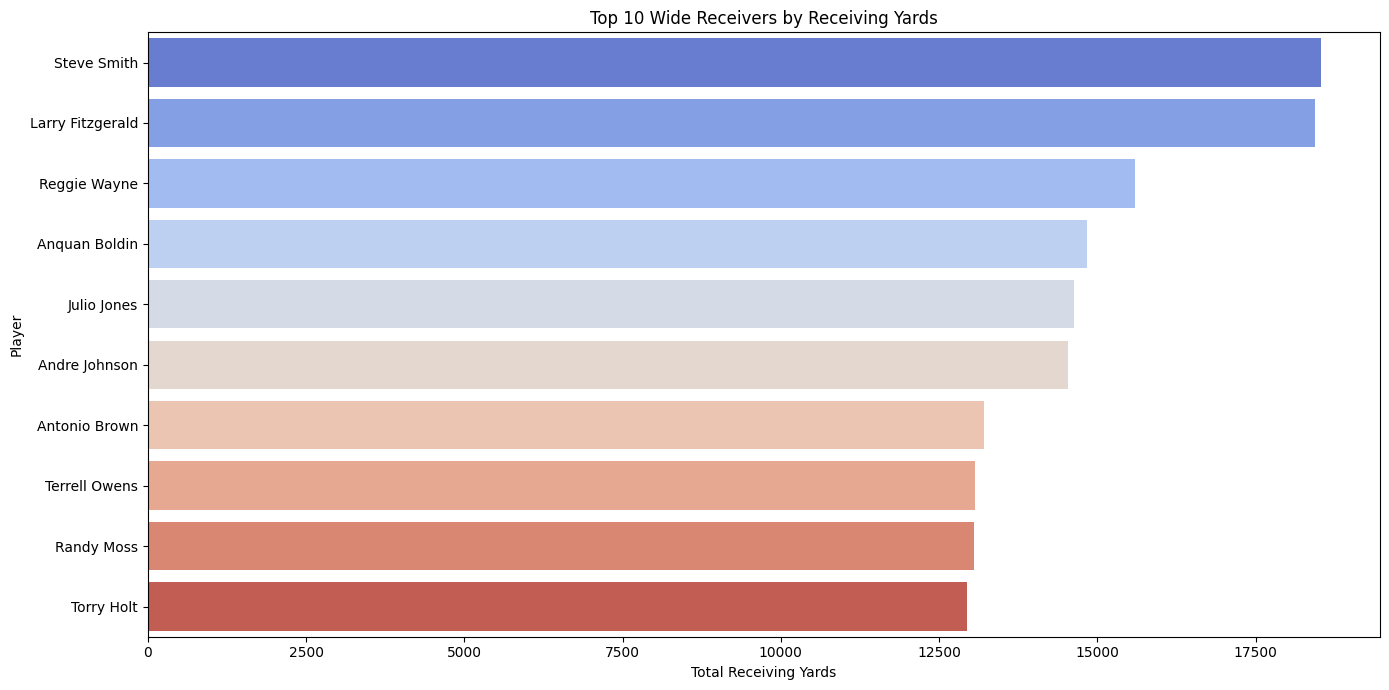

In [8]:
# Top Wide Receivers by Receiving Yards
top_wrs = playerstats_df[playerstats_df['position'] == 'WR'].groupby('player_display_name').agg({
    'receiving_yards': 'sum', 'receiving_tds': 'sum'
}).sort_values(by='receiving_yards', ascending=False).head(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='receiving_yards', y='player_display_name', data=top_wrs, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Wide Receivers by Receiving Yards')
plt.xlabel('Total Receiving Yards')
plt.ylabel('Player')
plt.tight_layout()

# Save visualization
plt.show()

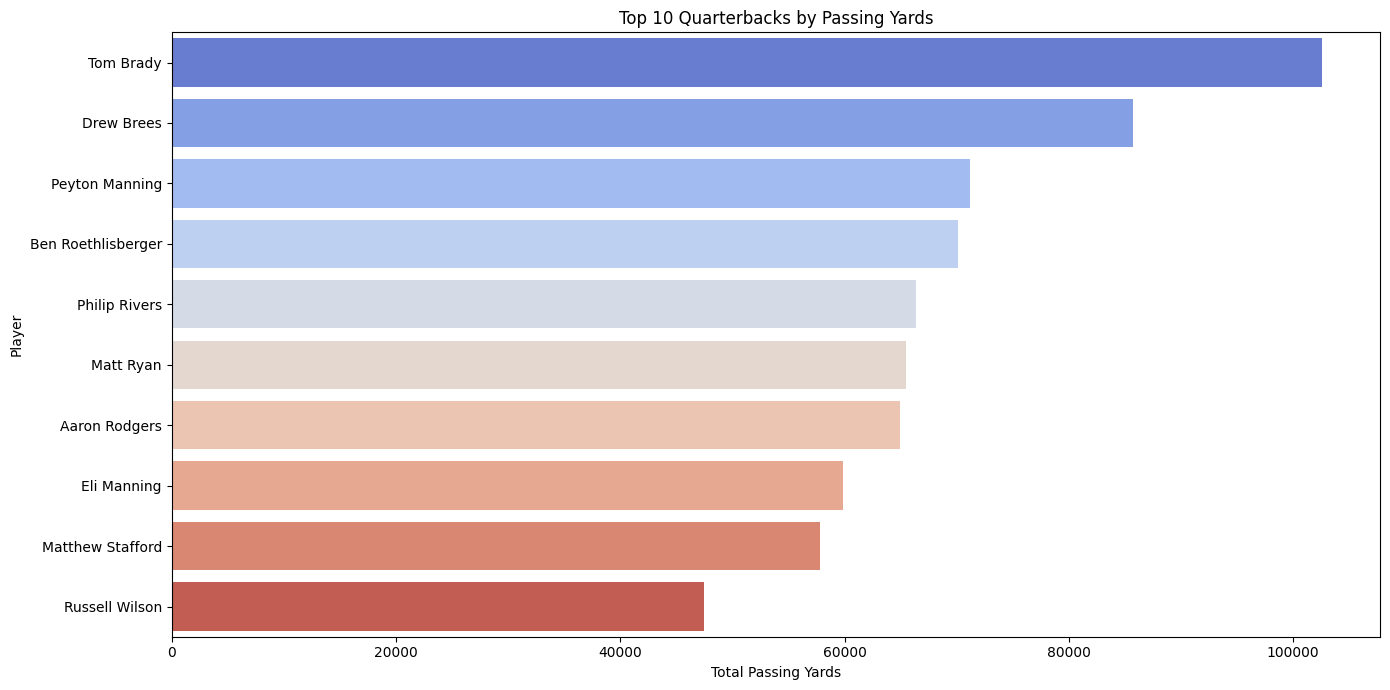

In [6]:
# Top Quarterbacks Performance
top_qbs = playerstats_df[playerstats_df['position'] == 'QB'].groupby('player_display_name').agg({
    'passing_yards': 'sum', 'passing_tds': 'sum'
}).sort_values(by='passing_yards', ascending=False).head(10).reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='passing_yards', y='player_display_name', data=top_qbs, palette='coolwarm', hue='player_display_name', dodge=False, legend=False)
plt.title('Top 10 Quarterbacks by Passing Yards')
plt.xlabel('Total Passing Yards')
plt.ylabel('Player')
plt.tight_layout()

# Save visualization
plt.savefig('top_quarterbacks.png')
plt.show()

In [4]:
# Avg Position Yards

# Connect to the SQLite database
db_path = 'data/nfl.db'  # Adjust the path if your database has a different name
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Find the most recent season in the dataset
cursor.execute("SELECT MAX(season) FROM Games;")
latest_season = cursor.fetchone()[0]

# Query to get the total passing and rushing yards for Cowboys in each game of the latest season
cowboys_team_yards_query = f"""
SELECT 
    g.game_id,
    SUM(CASE WHEN ps.recent_team = 'DAL' THEN ps.passing_yards ELSE 0 END) AS passing_yards,
    SUM(CASE WHEN ps.recent_team = 'DAL' THEN ps.rushing_yards ELSE 0 END) AS rushing_yards
FROM 
    Games g
JOIN 
    PlayerStats ps ON g.game_id = ps.game_id
WHERE 
    g.season = {latest_season} AND 
    (g.away_team = 'DAL' OR g.home_team = 'DAL')
GROUP BY 
    g.game_id;
"""

cursor.execute(cowboys_team_yards_query)
cowboys_game_yards = cursor.fetchall()

# Calculate total and average passing and rushing yards
total_passing_yards = sum(game[1] for game in cowboys_game_yards)
total_rushing_yards = sum(game[2] for game in cowboys_game_yards)

average_passing_yards_per_game = total_passing_yards / len(cowboys_game_yards)
average_rushing_yards_per_game = total_rushing_yards / len(cowboys_game_yards)

# Print the average yards per game
print(f"Average Passing Yards Per Game: {average_passing_yards_per_game}")
print(f"Average Rushing Yards Per Game: {average_rushing_yards_per_game}")

# Close the database connection
conn.close()


OperationalError: no such column: ps.recent_team

In [98]:
!cp -r ../Scrapers/data .

In [99]:
import pandas as pd

# Load the dataset
file_path = 'data/all_passing_rushing_receiving.csv'  # Adjust this path as needed
df = pd.read_csv(file_path)

# Count the number of rows before removing duplicates
row_count_before = df.shape[0]
print(f"Row count before removing duplicates: {row_count_before}")

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Count the number of rows after removing duplicates
row_count_after = df_cleaned.shape[0]
print(f"Row count after removing duplicates: {row_count_after}")

# Optionally, save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('data/all_passing_rushing_receiving.csv', index=False)
print("Cleaned file saved as 'all_passing_rushing_receiving.csv'")


Row count before removing duplicates: 309617
Row count after removing duplicates: 50295
Cleaned file saved as 'all_passing_rushing_receiving.csv'


In [45]:
# # All unique WR's from 2024

# import pandas as pd
# import os

# # Load the CSV file
# file_path = 'data/Rosters.csv'  # Replace with your file path
# data = pd.read_csv(file_path)

# wr_data_2024 = data[(data['season'] == 2024) & (data['position'] == 'WR')][['full_name', 'team']].drop_duplicates()

# # Define the output directory and file path
# output_dir = 'data/'
# os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist
# output_file_path = os.path.join(output_dir, 'wr_players_2024.csv')

# # Save the unique WR player names and team for the 2024 season to a CSV file
# wr_data_2024.to_csv(output_file_path, index=False)  # Save to CSV

# print(f"WR player names and teams for the 2024 season have been saved to: {output_file_path}")
# !open data/wr_players_2024.csv


WR player names and teams for the 2024 season have been saved to: data/wr_players_2024.csv


In [61]:
# # Add opponent_team and home columns ^

# # Load your dataset (adjust the file path accordingly)
# file_path = 'data/all_passing_rushing_receiving.csv'  # Replace with your actual file path
# df = pd.read_csv(file_path)

# # Dictionary to map incorrect team codes to the correct ones
# team_corrections = {
#     'NWE': 'NE',
#     'GNB': 'GB',
#     'KAN': 'KC',
#     'STL': 'LAR',
#     'NOR': 'NO',
#     'SDG': 'LAC',
#     'OAK': 'LVR',
#     'TAM': 'TB',
#     'SFO': 'SF'
# }

# # Apply the corrections to the 'team' column
# df['team'] = df['team'].replace(team_corrections)

# # Function to extract the opponent team from the game_id column
# def get_opponent_team(row):
#     game_id = row['game_id']
#     team = row['team']
    
#     # Split the game_id to extract the away and home teams
#     _, _, away_team, home_team = game_id.split('_')
    
#     # Determine the opponent based on whether the player's team is the home or away team
#     if team == home_team:
#         return away_team
#     elif team == away_team:
#         return home_team
#     else:
#         return None  # In case the team does not match either home or away (shouldn't happen)

# # Function to determine if the player was at home or away
# def is_player_home(row):
#     game_id = row['game_id']
#     team = row['team']
    
#     # Split the game_id to extract the away and home teams
#     _, _, away_team, home_team = game_id.split('_')
    
#     # Check if the player's team is the home team
#     return 'y' if team == home_team else 'n'

# # Apply the functions to create new columns 'opponent_team' and 'home'
# df['opponent_team'] = df.apply(get_opponent_team, axis=1)
# df['home'] = df.apply(is_player_home, axis=1)

# # Save the updated dataframe to the same CSV file
# df.to_csv('data/all_passing_rushing_receiving.csv', index=False)  # Save the result

# # Optionally display the first few rows to verify the changes
# print(df.head())
# # !open data/all_passing_rushing_receiving.csv

               player team  pass_cmp  pass_att  pass_yds  pass_td  pass_int  \
0  Ben Roethlisberger  PIT      26.0      38.0     351.0      1.0       1.0   
1  Ben Roethlisberger  PIT      26.0      38.0     351.0      1.0       1.0   
2  Ben Roethlisberger  PIT      26.0      38.0     351.0      1.0       1.0   
3  Ben Roethlisberger  PIT      26.0      38.0     351.0      1.0       1.0   
4  Ben Roethlisberger  PIT      26.0      38.0     351.0      1.0       1.0   

   pass_sacked  pass_sacked_yds  pass_long  ...  rec  rec_yds  rec_td  \
0          2.0             13.0       43.0  ...  0.0      0.0     0.0   
1          2.0             13.0       43.0  ...  0.0      0.0     0.0   
2          2.0             13.0       43.0  ...  0.0      0.0     0.0   
3          2.0             13.0       43.0  ...  0.0      0.0     0.0   
4          2.0             13.0       43.0  ...  0.0      0.0     0.0   

   rec_long  fumbles  fumbles_lost         game_id  position  opponent_team  \
0      

In [8]:
# Single WR Stats 
# Longest Reception Stats
# Matchup Stats

# player_name = 'Jaylen Waddle'
player_name = 'Tyreek Hill'
# player_name = 'Dawson Knox'
# player_name = 'Justin Jefferson'
opponent_team = 'SEA'

all_stats_df = pd.read_csv('data/all_passing_rushing_receiving.csv')

def get_player_longest_reception_stats(player_name, opponent_team=None):
    # Step 1: Filter the dataset for the specific player
    player_data = all_stats_df[all_stats_df['player'] == player_name]

    if 'rec_long' not in player_data.columns:
        return f"No reception data available for {player_name}"

    # Step 2: Calculate career statistics across all opponents
    longest_reception = player_data['rec_long'].max()  # Career-longest reception
    total_games = player_data.shape[0]

    # Step 3: If opponent is provided, calculate statistics against that opponent
    opponent_insights = None
    opponent_data = None
    if opponent_team:
        # Filter the data based on the specified opponent team
        opponent_data = player_data[player_data['opponent_team'] == opponent_team].drop_duplicates(subset=['game_id', 'rec_yds'])
        
        if opponent_data.empty:
            opponent_insights = f"No data available for {player_name} against {opponent_team}"
        else:
            opponent_insights = {
                "Opponent": opponent_team,
                "Longest Reception vs Opponent": opponent_data['rec_long'].max(),
                "Average Longest Reception vs Opponent": opponent_data['rec_long'].mean(),
                "Total Games vs Opponent": opponent_data.shape[0],
                "Games with 30+ Yard Reception vs Opponent": opponent_data[opponent_data['rec_long'] >= 30].shape[0],
                "Average Receptions per Game vs Opponent": opponent_data['rec'].mean(),
                "Average Receiving Yards per Game vs Opponent": opponent_data['rec_yds'].mean(),
                "Receiving Touchdowns vs Opponent": opponent_data['rec_td'].sum(),
                "Average Targets per Game vs Opponent": opponent_data['targets'].mean() if 'targets' in opponent_data.columns else "N/A",
            }

    else:
        opponent_insights = "No opponent provided."

    # Step 4: Create useful career betting insights
    career_insights = {
        "Player": player_name,
        "Career Longest Reception": longest_reception,
        "Total Games Played": total_games,
    }

    return career_insights, opponent_insights, opponent_data

career_insights, opponent_insights, opponent_data = get_player_longest_reception_stats(player_name, opponent_team)

# Print the insights
print("\nCAREER INSIGHTS:")
for key, value in career_insights.items():
    print(f"{key}: {value}")

print("\nOPPONENT INSIGHTS:")
if isinstance(opponent_insights, dict):
    for key, value in opponent_insights.items():
        print(f"{key}: {value}")
else:
    print(opponent_insights)

# Print game_ids and rec_yds against the opponent at the end
if opponent_data is not None:
    print("\nGAMES AGAINST OPPONENT:")
    for index, row in opponent_data.iterrows():
        print(f"{index + 1}. Game ID: {row['game_id']}, Rec Yards: {row['rec_yds']}")


CAREER INSIGHTS:
Player: Tyreek Hill
Career Longest Reception: 80.0
Total Games Played: 1269

OPPONENT INSIGHTS:
Opponent: SEA
Longest Reception vs Opponent: 32.0
Average Longest Reception vs Opponent: 32.0
Total Games vs Opponent: 1
Games with 30+ Yard Reception vs Opponent: 1
Average Receptions per Game vs Opponent: 4.0
Average Receiving Yards per Game vs Opponent: 74.0
Receiving Touchdowns vs Opponent: 0.0
Average Targets per Game vs Opponent: 9.0

GAMES AGAINST OPPONENT:
168036. Game ID: 2018_16_KC_SEA, Rec Yards: 74.0


In [106]:
# QB Rushing Touchdowns 

df_updated = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Filter the dataset for Baker Mayfield's entire career and focus on rushing touchdowns
baker_mayfield_rushing_career = df_updated[df_updated['player'] == 'Baker Mayfield']

# Sum the rushing touchdowns and get the detailed breakdown
baker_mayfield_rushing_td_career = baker_mayfield_rushing_career['rush_td'].sum()

# Get the details of games where he scored rushing touchdowns
baker_mayfield_rushing_career_details = baker_mayfield_rushing_career[baker_mayfield_rushing_career['rush_td'] > 0][['game_id', 'opponent_team', 'rush_td']]

# Extract the year and week from the game_id
baker_mayfield_rushing_career_details['Year'] = baker_mayfield_rushing_career_details['game_id'].str[:4]
baker_mayfield_rushing_career_details['Week'] = baker_mayfield_rushing_career_details['game_id'].str[5:7]

baker_mayfield_rushing_td_career, baker_mayfield_rushing_career_details


(7.0,
                game_id opponent_team  rush_td  Year Week
 17880  2019_06_SEA_CLE           SEA      1.0  2019   06
 19234  2019_11_PIT_CLE           PIT      1.0  2019   11
 20186  2019_14_CIN_CLE           CIN      1.0  2019   14
 31727  2020_14_BAL_CLE           BAL      1.0  2020   14
 33406  2021_02_HOU_CLE           HOU      1.0  2021   02
 42710   2023_14_TB_ATL           ATL      1.0  2023   14
 44592  2022_01_CLE_CAR           CLE      1.0  2022   01)

In [72]:
# Deeper with prediction yards and receptions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# Step 3: Feature Engineering
# Average Depth of Target (aDOT) - approximation using rec yards/targets
df['aDOT'] = df['rec_yds'] / df['targets']

# Step 4: Drop rows with missing values in critical columns
df.dropna(subset=['targets', 'rec_yds', 'aDOT'], inplace=True)

# Step 5: Prepare the data for modeling (use only 'targets' and 'aDOT')
y = df['rec_yds']
X = df[['targets', 'aDOT']]  # Only use targets and aDOT as features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 7: Model Evaluation (Linear Regression)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Print Linear Regression Model Performance
# print(f"Linear Regression RMSE: {rmse_linear:.2f}")
# print(f"Linear Regression R-squared: {r2_linear:.2f}")

# Step 8: Build a more complex model (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Step 9: Model Evaluation (Random Forest)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Random Forest Model Performance
# print(f"Random Forest RMSE: {rmse_rf:.2f}")
# print(f"Random Forest R-squared: {r2_rf:.2f}")

# Step 10: Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X.columns

# Visualize Feature Importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances, y=features)
# plt.title('Feature Importance - Random Forest')
# plt.show()

# Step 11: Detailed Model Comparison
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_linear, rmse_rf],
    'R-squared': [r2_linear, r2_rf]
})

print("\nModel Comparison:")
print(results_df)

# Step 12: Print a few test predictions for comparison
predictions_df = pd.DataFrame({
    'Actual rec_yds': y_test,
    'Linear Prediction': y_pred_linear,
    'Random Forest Prediction': y_pred_rf
}).head(10)

print("\nSample Predictions (First 10 Rows):")
print(predictions_df)



Model Comparison:
               Model       RMSE  R-squared
0  Linear Regression  14.506928   0.811543
1      Random Forest   0.041690   0.999998

Sample Predictions (First 10 Rows):
        Actual rec_yds  Linear Prediction  Random Forest Prediction
75653             34.0          32.187300                      34.0
33648             31.0          30.119830                      31.0
63458             24.0          29.971763                      24.0
75206             14.0          13.636249                      14.0
258247             6.0           1.343787                       6.0
59191             83.0          62.857273                      83.0
161420            11.0          16.336696                      11.0
68298              7.0          13.580069                       7.0
119633            42.0          39.364766                      42.0
70818             39.0          38.241643                      39.0


In [73]:
# Adjusted using 2020-2023 as training set and 2024 as test set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# Step 3: Extract season and week from `game_id`
df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract season from game_id

# Step 4: Feature Engineering
# Average Depth of Target (aDOT) - approximation using rec yards/targets
df['aDOT'] = df['rec_yds'] / df['targets']

# Step 5: Split the dataset into training and test sets
# Training set: Seasons 2020-2023
train_df = df[df['season'].between(2020, 2023)]

# Test set: Season 2024
test_df = df[df['season'] == 2024]

# Step 6: Prepare the data for modeling
y_train = train_df['rec_yds']
X_train = train_df[['targets', 'aDOT']]  # Only use targets and aDOT as features for training

y_test = test_df['rec_yds']
X_test = test_df[['targets', 'aDOT']]  # Only use targets and aDOT as features for testing

# Step 7: Build and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 8: Model Evaluation (Linear Regression)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Print Linear Regression Model Performance
# print(f"Linear Regression RMSE: {rmse_linear:.2f}")
# print(f"Linear Regression R-squared: {r2_linear:.2f}")

# Step 9: Build a more complex model (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Step 10: Model Evaluation (Random Forest)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print Random Forest Model Performance
# print(f"Random Forest RMSE: {rmse_rf:.2f}")
# print(f"Random Forest R-squared: {r2_rf:.2f}")

# Step 11: Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Visualize Feature Importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importances, y=features)
# plt.title('Feature Importance - Random Forest')
# plt.show()

# Step 12: Detailed Model Comparison
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_linear, rmse_rf],
    'R-squared': [r2_linear, r2_rf]
})

print("\nModel Comparison:")
print(results_df)

# Step 13: Print a few test predictions for comparison
predictions_df = pd.DataFrame({
    'Actual rec_yds': y_test,
    'Linear Prediction': y_pred_linear,
    'Random Forest Prediction': y_pred_rf
}).head(10)

print("\nSample Predictions (First 10 Rows):")
print(predictions_df)


Model Comparison:
               Model       RMSE  R-squared
0  Linear Regression  13.864789   0.746722
1      Random Forest   0.588818   0.999543

Sample Predictions (First 10 Rows):
        Actual rec_yds  Linear Prediction  Random Forest Prediction
132003            37.0          67.099899                      37.0
132004            37.0          67.099899                      37.0
132005            52.0          58.729043                      52.0
132006            52.0          58.729043                      52.0
132007            52.0          58.729043                      52.0
132008            52.0          58.729043                      52.0
132009            52.0          58.729043                      52.0
132010            52.0          58.729043                      52.0
132011           111.0          97.995123                     111.0
132012           111.0          97.995123                     111.0


---

In [ ]:
# Making empty rows for upcoming games test set

# Load your data
file_path = 'data/all_passing_rushing_receiving.csv'
df = pd.read_csv(file_path)

# Get the list of upcoming game_ids
upcoming_game_ids = [
    "2024_02_BUF_MIA", "2024_02_LV_BAL", "2024_02_LAC_CAR", "2024_02_NO_DAL", "2024_02_TB_DET", 
    "2024_02_IND_GB", "2024_02_CLE_JAX", "2024_02_SF_MIN", "2024_02_SEA_NE", "2024_02_NYJ_TEN", 
    "2024_02_NYG_WAS", "2024_02_LA_ARI", "2024_02_PIT_DEN", "2024_02_CIN_KC", "2024_02_CHI_HOU", 
    "2024_02_ATL_PHI"
]

# Filter only WRs from week 1 of the 2024 season (assuming 'position' column exists)
week_1_2024_wrs = df[(df['game_id'].str.contains("2024_01")) & (df['position'] == 'WR')]

# Drop duplicates by 'player' to ensure unique players
# week_1_2024_wrs = week_1_2024_wrs.drop_duplicates(subset=['player'])

# Create empty rows for each WR for each upcoming game
empty_rows = []
for game_id in upcoming_game_ids:
    for index, row in week_1_2024_wrs.iterrows():
        empty_row = {col: None for col in df.columns}  # Initialize an empty row
        empty_row['player'] = row['player']  # Keep player name
        empty_row['team'] = row['team']  # Keep team info
        empty_row['game_id'] = game_id  # Assign the new game_id
        empty_rows.append(empty_row)

# Convert the list of empty rows to a DataFrame
empty_df = pd.DataFrame(empty_rows)

# Drop duplicates by 'player' to ensure unique players
empty_df = empty_df.drop_duplicates(subset=['player'])

# Save the resulting dataframe to master.csv
empty_df.to_csv('data/all_passing_rushing_receiving_test_set.csv', index=False)

# Display the first few rows of the new DataFrame (optional)
print(empty_df.head())
# !open data/all_passing_rushing_receiving_test_set.csv

# Load the original "all_games" and the "test set" dataframes
all_games_path = 'data/all_passing_rushing_receiving.csv'
test_set_path = 'data/all_passing_rushing_receiving_test_set.csv'

all_games_df = pd.read_csv(all_games_path)
test_set_df = pd.read_csv(test_set_path)

# Append the test set rows to the original dataset
combined_df = pd.concat([all_games_df, test_set_df], ignore_index=True)

# Save the combined dataframe to a new CSV file
output_combined_path = 'data/master.csv'
combined_df.to_csv(output_combined_path, index=False)

# Provide the link to download the combined dataset
output_combined_path

In [83]:
# # # Using 2015-2024 Week 1 as Training to Predict Upcoming Week^

# # import pandas as pd
# # import numpy as np
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # from sklearn.model_selection import train_test_split
# # from sklearn.linear_model import LinearRegression
# # from sklearn.metrics import mean_squared_error, r2_score
# # from sklearn.ensemble import RandomForestRegressor

# # # Step 1: Load and clean the dataset
# # df = pd.read_csv('data/master.csv')

# # # Step 2: Filter for players who have receiving data
# # df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# # # Step 3: Extract season and week from `game_id`
# # df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract season from game_id

# # # Step 4: Feature Engineering
# # # Average Depth of Target (aDOT) - approximation using rec yards/targets
# # df['aDOT'] = df['rec_yds'] / df['targets']

# # # Step 5: Split the dataset into training and test sets
# # # Extract the week from `game_id`
# # df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))  # Extract the week number and remove leading zeros

# # # Training set: Seasons 2020-2023 + Week 1 of 2024
# # train_df = df[(df['season'].between(2020, 2023)) | ((df['season'] == 2024) & (df['week'] == 1))]

# # # Test set: Week 2 and beyond of Season 2024
# # test_df = df[(df['season'] == 2024) & (df['week'] > 1)]

# # # Step 6: Prepare the data for modeling
# # y_train = train_df['rec_yds']
# # X_train = train_df[['targets', 'aDOT']]  # Only use targets and aDOT as features for training

# # y_test = test_df['rec_yds']
# # X_test = test_df[['targets', 'aDOT']]  # Only use targets and aDOT as features for testing

# # # Step 7: Build and Train the Linear Regression Model
# # linear_model = LinearRegression()
# # linear_model.fit(X_train, y_train)

# # # Step 8: Model Evaluation (Linear Regression)
# # y_pred_linear = linear_model.predict(X_test)
# # rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
# # r2_linear = r2_score(y_test, y_pred_linear)

# # # Print Linear Regression Model Performance
# # # print(f"Linear Regression RMSE: {rmse_linear:.2f}")
# # # print(f"Linear Regression R-squared: {r2_linear:.2f}")

# # # Step 9: Build a more complex model (Random Forest)
# # rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
# # rf_model.fit(X_train, y_train)

# # # Step 10: Model Evaluation (Random Forest)
# # y_pred_rf = rf_model.predict(X_test)
# # rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
# # r2_rf = r2_score(y_test, y_pred_rf)

# # # Print Random Forest Model Performance
# # # print(f"Random Forest RMSE: {rmse_rf:.2f}")
# # # print(f"Random Forest R-squared: {r2_rf:.2f}")

# # # Step 11: Feature Importance (Random Forest)
# # feature_importances = rf_model.feature_importances_
# # features = X_train.columns

# # # Visualize Feature Importance
# # # plt.figure(figsize=(10, 6))
# # # sns.barplot(x=feature_importances, y=features)
# # # plt.title('Feature Importance - Random Forest')
# # # plt.show()

# # # Step 12: Detailed Model Comparison
# # results_df = pd.DataFrame({
# #     'Model': ['Linear Regression', 'Random Forest'],
# #     'RMSE': [rmse_linear, rmse_rf],
# #     'R-squared': [r2_linear, r2_rf]
# # })

# # print("\nModel Comparison:")
# # print(results_df)

# # # Step 13: Print a few test predictions for comparison
# # predictions_df = pd.DataFrame({
# #     'Actual rec_yds': y_test,
# #     'Linear Prediction': y_pred_linear,
# #     'Random Forest Prediction': y_pred_rf
# # }).head(10)

# # print("\nSample Predictions (First 10 Rows):")
# # print(predictions_df)
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

# # Step 1: Load and clean the dataset
# # df = pd.read_csv('data/master.csv')
# df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# # Step 2: Filter for players who have receiving data
# df = df[df['rec'] > 0]

# # Step 3: Extract season and week from `game_id`
# df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract season from game_id
# df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))  # Extract week from game_id

# # Step 4: Feature Engineering - Average Depth of Target (aDOT)
# df['aDOT'] = df['rec_yds'] / df['targets']

# # Step 5: Use rolling averages to estimate future stats for upcoming games
# # Sort the data by player and game order
# df = df.sort_values(by=['player', 'season', 'week'])

# # Calculate rolling averages for key stats (e.g., last 3 games)
# # Ensure the rolling features are created by shifting player stats
# df['rolling_targets'] = df.groupby('player')['targets'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
# df['rolling_aDOT'] = df.groupby('player')['aDOT'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())

# # Fill NaN values in rolling averages with 0 to avoid errors during model training
# df['rolling_targets'] = df['rolling_targets'].fillna(0)
# df['rolling_aDOT'] = df['rolling_aDOT'].fillna(0)

# # Now proceed with the remaining steps

# # Step 6: Prepare the data for modeling
# y_train = train_df['rec_yds']
# X_train = train_df[['rolling_targets', 'rolling_aDOT']]  # Use rolling averages as features for training

# # For unplayed games, estimate future stats using rolling averages from past games
# X_test = test_df[['rolling_targets', 'rolling_aDOT']]

# # Step 8: Build and Train the Linear Regression Model
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)

# # Step 9: Predict receiving yards for upcoming games (Week 2 and beyond of 2024)
# test_df['Linear Prediction'] = linear_model.predict(X_test)

# # Save the predictions to a CSV file for analysis
# test_df[['player', 'game_id', 'Linear Prediction']].to_csv('week2_predictions.csv', index=False)

# # Step 7: Prepare the data for modeling
# y_train = train_df['rec_yds']
# X_train = train_df[['rolling_targets', 'rolling_aDOT']]  # Use rolling averages as features for training

# # For unplayed games, estimate future stats using rolling averages from past games
# X_test = test_df[['rolling_targets', 'rolling_aDOT']]

# # Step 8: Build and Train the Linear Regression Model
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)

# # Step 9: Predict receiving yards for upcoming games (Week 2 and beyond of 2024)
# test_df['Linear Prediction'] = linear_model.predict(X_test)

# # Step 10: Build and Train the Random Forest Model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
# rf_model.fit(X_train, y_train)

# # Step 11: Predict using Random Forest
# test_df['Random Forest Prediction'] = rf_model.predict(X_test)

# # Step 12: Save the predictions to a CSV file for future analysis
# output_file = 'week2_predictions.csv'
# test_df[['player', 'game_id', 'Linear Prediction', 'Random Forest Prediction']].to_csv(output_file, index=False)

# print(f"Predictions saved to {output_file}")
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/master.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]

# Step 3: Extract season and week from `game_id`
df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract season from game_id
df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))  # Extract week from game_id

# Step 4: Feature Engineering - Average Depth of Target (aDOT)
df['aDOT'] = df['rec_yds'] / df['targets']

# Step 5: Use rolling averages to estimate future stats for upcoming games
# Sort the data by player and game order
df = df.sort_values(by=['player', 'season', 'week'])

# Calculate rolling averages for key stats (e.g., last 3 games)
df['rolling_targets'] = df.groupby('player')['targets'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
df['rolling_aDOT'] = df.groupby('player')['aDOT'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())

# Fill NaN values in rolling averages with 0 to avoid errors during model training
df['rolling_targets'] = df['rolling_targets'].fillna(0)
df['rolling_aDOT'] = df['rolling_aDOT'].fillna(0)

# Step 6: Split the dataset into training and test sets
# Training set: Seasons 2020-2023 + Week 1 of 2024
train_df = df[(df['season'].between(2020, 2023)) | ((df['season'] == 2024) & (df['week'] == 1))]

# Test set: Week 2 and beyond of Season 2024
test_df = df[(df['season'] == 2024) & (df['week'] > 1)]

# Step 7: Prepare the data for modeling
y_train = train_df['rec_yds']
X_train = train_df[['rolling_targets', 'rolling_aDOT']]  # Use rolling averages as features for training

# For unplayed games, estimate future stats using rolling averages from past games
X_test = test_df[['rolling_targets', 'rolling_aDOT']]

# Step 8: Build and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 9: Predict receiving yards for upcoming games (Week 2 and beyond of 2024)
test_df['Linear Prediction'] = linear_model.predict(X_test)

# Step 10: Build and Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Step 11: Predict using Random Forest
test_df['Random Forest Prediction'] = rf_model.predict(X_test)

# Step 12: Save the predictions to a CSV file for future analysis
output_file = 'week2_predictions.csv'
test_df[['player', 'game_id', 'Linear Prediction', 'Random Forest Prediction']].to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by LinearRegression.

In [84]:
# With shifting strategy ^

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv('data/master.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]

# Step 3: Extract season and week from `game_id`
df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0])) 
df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))

# Step 4: Feature Engineering - Use lagged/shifted features
# Sort by player and game to ensure proper chronological order
df = df.sort_values(by=['player', 'season', 'week'])

# Create rolling features using the last N games (e.g., 3 games)
df['rolling_targets'] = df.groupby('player')['targets'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())
df['rolling_aDOT'] = df.groupby('player')['aDOT'].transform(lambda x: x.shift(1).rolling(3, min_periods=1).mean())

# Step 5: Remove rows where rolling values are NaN (due to the shift)
df.dropna(subset=['rolling_targets', 'rolling_aDOT'], inplace=True)

# Step 6: Define the target and features
y = df['rec_yds']  # The target variable is receiving yards for the NEXT game
X = df[['rolling_targets', 'rolling_aDOT']]

# Step 7: Split into training and test sets (use earlier seasons for training)
train_df = df[(df['season'].between(2020, 2023)) | ((df['season'] == 2024) & (df['week'] == 1))]
test_df = df[(df['season'] == 2024) & (df['week'] > 1)]

X_train = train_df[['rolling_targets', 'rolling_aDOT']]
y_train = train_df['rec_yds']

X_test = test_df[['rolling_targets', 'rolling_aDOT']]
y_test = test_df['rec_yds']

# Step 8: Train a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 9: Evaluate the Model
y_pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test RMSE: {rmse:.2f}")


KeyError: 'Column not found: aDOT'

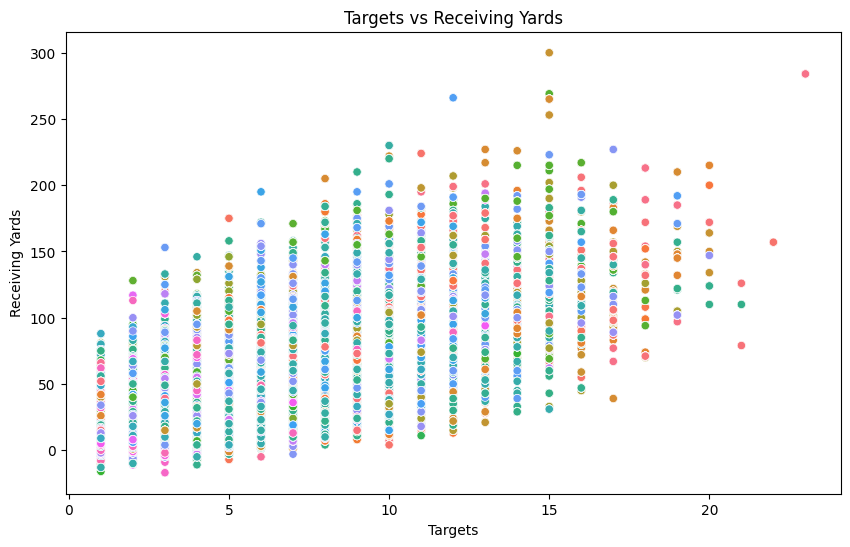

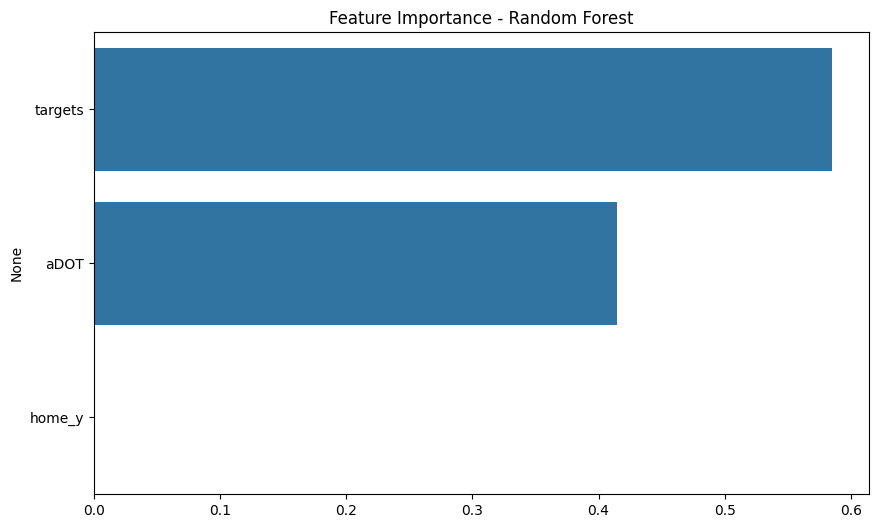

Linear Regression RMSE: 14.51
Random Forest RMSE: 0.04
Feature Importances:
targets: 0.5849
aDOT: 0.4150
home_y: 0.0000


In [63]:
# Deeper with prediction yards and receptions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# Step 3: Feature Engineering
# Targets Per Game (TPG)
df['targets_per_game'] = df['targets'] / df.groupby('player')['game_id'].transform('count')

# Average Depth of Target (aDOT) - approximation using rec yards/targets
df['aDOT'] = df['rec_yds'] / df['targets']

# Target Share - Player's targets / team passing attempts (approximation)
df['target_share'] = df['targets'] / df.groupby('team')['pass_att'].transform('sum')

# Rolling averages for smoothing (last 3 games)
df['rolling_rec_yds'] = df.groupby('player')['rec_yds'].transform(lambda x: x.rolling(3, 1).mean())
df['rolling_targets'] = df.groupby('player')['targets'].transform(lambda x: x.rolling(3, 1).mean())

# Step 4: Visualize correlations and trends
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='targets', y='rec_yds', hue='player', legend=None)
plt.title('Targets vs Receiving Yards')
plt.xlabel('Targets')
plt.ylabel('Receiving Yards')
plt.show()

# Step 5: Prepare the data for modeling
# Drop rows with missing values in critical columns
df.dropna(subset=['targets', 'rec_yds', 'aDOT', 'target_share'], inplace=True)

# Define the target variable (receiving yards)
y = df['rec_yds']

# Features (input variables)
X = df[['targets', 'aDOT', 'home']]  # Select features
# X = df[['targets', 'aDOT', 'target_share', 'rolling_targets', 'home']]  # Select features
X = pd.get_dummies(X, columns=['home'], drop_first=True)  # Convert home/away to numerical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build and Train the Model
# Start with a simple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 7: Model Evaluation (Linear Regression)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Step 8: Build a more complex model (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 9: Model Evaluation (Random Forest)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Step 10: Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X.columns

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()

# # Results
# {
#     "Linear Regression RMSE": rmse_linear,
#     "Random Forest RMSE": rmse_rf,
#     "Feature Importances": dict(zip(features, feature_importances))
# }

# Step 9: Evaluate the Linear Regression Model
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression RMSE: {rmse_linear:.2f}")

# Step 11: Evaluate the Random Forest Model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# You can also print the feature importance in a more readable format
importance_dict = dict(zip(features, feature_importances))
print("Feature Importances:")
for key, value in importance_dict.items():
    print(f"{key}: {value:.4f}")


In [ ]:
# Using 2015-2024 Week 1 as Training to Predict Upcoming Week^

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# Step 3: Extract season and week from game_id
# Assuming the game_id is in the format "YYYY_WW_TEAM_TEAM"
df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract the year (season)
df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))  # Extract the week number, remove leading zeros

# Step 4: Create Training and Test Sets
# Training set: Seasons 2015-2023 + Week 1 of 2024
train_df = df[(df['season'] < 2024) | ((df['season'] == 2024) & (df['week'] == 1))]

# Test set: Week 2 of the 2024 season
test_df = df[(df['season'] == 2024) & (df['week'] == 2)]

# Step 5: Feature Engineering
# Targets Per Game (TPG)
train_df['targets_per_game'] = train_df['targets'] / train_df.groupby('player')['game_id'].transform('count')
test_df['targets_per_game'] = test_df['targets'] / test_df.groupby('player')['game_id'].transform('count')

# Average Depth of Target (aDOT)
train_df['aDOT'] = train_df['rec_yds'] / train_df['targets']
test_df['aDOT'] = test_df['rec_yds'] / test_df['targets']

# Target Share
train_df['target_share'] = train_df['targets'] / train_df.groupby('team')['pass_att'].transform('sum')
test_df['target_share'] = test_df['targets'] / test_df.groupby('team')['pass_att'].transform('sum')

# Rolling averages for smoothing (last 3 games)
train_df['rolling_rec_yds'] = train_df.groupby('player')['rec_yds'].transform(lambda x: x.rolling(3, 1).mean())
train_df['rolling_targets'] = train_df.groupby('player')['targets'].transform(lambda x: x.rolling(3, 1).mean())

test_df['rolling_rec_yds'] = test_df.groupby('player')['rec_yds'].transform(lambda x: x.rolling(3, 1).mean())
test_df['rolling_targets'] = test_df.groupby('player')['targets'].transform(lambda x: x.rolling(3, 1).mean())

# Step 6: Prepare features and target for modeling
# Drop rows with missing values in critical columns
train_df.dropna(subset=['targets', 'rec_yds', 'aDOT', 'target_share'], inplace=True)
test_df.dropna(subset=['targets', 'rec_yds', 'aDOT', 'target_share'], inplace=True)

# Define target variable (receiving yards)
y_train = train_df['rec_yds']
y_test = test_df['rec_yds']

# Features (input variables)
X_train = train_df[['targets', 'aDOT', 'target_share', 'rolling_targets', 'home']]  # Select features
X_test = test_df[['targets', 'aDOT', 'target_share', 'rolling_targets', 'home']]  # Select features

# Convert home/away to numerical
X_train = pd.get_dummies(X_train, columns=['home'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['home'], drop_first=True)

# Step 7: Build and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 8: Evaluate the Linear Regression Model
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression RMSE: {rmse_linear:.2f}")

# Step 9: Build and Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 10: Evaluate the Random Forest Model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

# Step 11: Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
features = X_train.columns

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.show()

# You can also print the feature importance in a more readable format
importance_dict = dict(zip(features, feature_importances))
print("Feature Importances:")
for key, value in importance_dict.items():
    print(f"{key}: {value:.4f}")


In [47]:
# ^ Testing with upcoming games in seperate file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load and clean the dataset
df = pd.read_csv('data/all_passing_rushing_receiving.csv')

# Step 2: Filter for players who have receiving data
df = df[df['rec'] > 0]  # Only keep rows where player has receptions

# Step 3: Extract season and week from game_id
# Assuming the game_id is in the format "YYYY_WW_TEAM_TEAM"
df['season'] = df['game_id'].apply(lambda x: int(x.split('_')[0]))  # Extract the year (season)
df['week'] = df['game_id'].apply(lambda x: int(x.split('_')[1].lstrip('0')))  # Extract the week number, remove leading zeros

# Step 4: Create Training Set (2015-2024 Week 1)
train_df = df[(df['season'] < 2024) | ((df['season'] == 2024) & (df['week'] == 1))]

# Step 5: Feature Engineering for the Training Set
# Targets Per Game (TPG)
train_df['targets_per_game'] = train_df['targets'] / train_df.groupby('player')['game_id'].transform('count')

# Average Depth of Target (aDOT)
train_df['aDOT'] = train_df['rec_yds'] / train_df['targets']

# Target Share
train_df['target_share'] = train_df['targets'] / train_df.groupby('team')['pass_att'].transform('sum')

# Rolling averages for smoothing (last 3 games)
train_df['rolling_rec_yds'] = train_df.groupby('player')['rec_yds'].transform(lambda x: x.rolling(3, 1).mean())
train_df['rolling_targets'] = train_df.groupby('player')['targets'].transform(lambda x: x.rolling(3, 1).mean())

# Step 6: Load the new test set for Week 2 (from full_test_week2_2024_cleaned.csv)
test_df = pd.read_csv('full_test_week2_2024_cleaned.csv')

# Step 7: Prepare the Test Set (We assume the necessary columns are already in place in the new test set)
# Fill in missing values or placeholders as needed
test_df['aDOT'] = test_df['aDOT'].fillna(0)  # Ensure aDOT is filled
test_df['target_share'] = test_df['target_share'].fillna(0)  # Ensure target share is filled
test_df['rolling_targets'] = test_df['rolling_targets'].fillna(0)  # Ensure rolling targets are filled
test_df['home'] = test_df['home'].fillna(0)  # Ensure home/away is filled (if missing)

# Step 8: Prepare features and target for modeling
# Define target variable (receiving yards) for training set
y_train = train_df['rec_yds']

# Features (input variables)
X_train = train_df[['targets', 'aDOT', 'target_share', 'rolling_targets', 'home']]  # Select features
X_test = test_df[['targets', 'aDOT', 'target_share', 'rolling_targets', 'home']]  # Select same features for the test set

# Convert home/away to numerical (if not already numeric in the test set)
X_train = pd.get_dummies(X_train, columns=['home'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['home'], drop_first=True)

# Step 9: Build and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 10: Predict using the Week 2 test set and evaluate the Linear Regression Model
y_pred_linear = linear_model.predict(X_test)

# Display the predictions for the upcoming Week 2 games
test_df['predicted_rec_yds'] = y_pred_linear
print(test_df[['full_name', 'predicted_rec_yds']])

# Step 11: Build and Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 12: Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Add the predictions to the test set
test_df['predicted_rec_yds_rf'] = y_pred_rf

# Display predictions for Random Forest model
print(test_df[['full_name', 'predicted_rec_yds_rf']])

# Step 13: Save the predictions for Week 2
test_df.to_csv('predictions_week2_2024.csv', index=False)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- home_y


In [54]:
# Add position column ^

!cp ../Scrapers/all_passing_rushing_receiving.csv data/

# Load the CSV files
all_passing_file = 'data/all_passing_rushing_receiving.csv'
rosters_file = 'data/Rosters.csv'

all_passing_df = pd.read_csv(all_passing_file)
rosters_df = pd.read_csv(rosters_file)

# Merge the two dataframes on player names
merged_df = pd.merge(all_passing_df, rosters_df[['full_name', 'position']], 
                     left_on='player', right_on='full_name', how='left')

# Ensure the 'position' column exists even if no matches are found
if 'position' not in merged_df.columns:
    merged_df['position'] = None

# Filter only relevant positions (QB, WR, TE, RB)
relevant_positions = ['QB', 'WR', 'TE', 'RB']
merged_df['position'] = merged_df['position'].where(merged_df['position'].isin(relevant_positions), None)

# Drop the full_name column that was added during the merge
merged_df.drop(columns=['full_name'], inplace=True)

# Ensure all rows for a player have the same position
merged_df['position'] = merged_df.groupby('player')['position'].transform(lambda x: x.ffill().bfill())

# Save the updated dataframe to a new CSV file
merged_df.to_csv('data/all_passing_rushing_receiving.csv', index=False)

# Optionally display the updated dataframe
print(merged_df[['player', 'position']].head())

# Optional command to open the CSV file (depending on your environment)
# !open data/all_passing_rushing_receiving.csv

!open data/all_passing_rushing_receiving.csv

               player position
0  Ben Roethlisberger       QB
1  Ben Roethlisberger       QB
2  Ben Roethlisberger       QB
3  Ben Roethlisberger       QB
4  Ben Roethlisberger       QB


In [75]:
# Making empty rows for upcoming games test set

# Load your data
file_path = 'data/all_passing_rushing_receiving.csv'
df = pd.read_csv(file_path)

# Get the list of upcoming game_ids
upcoming_game_ids = [
    "2024_02_BUF_MIA", "2024_02_LV_BAL", "2024_02_LAC_CAR", "2024_02_NO_DAL", "2024_02_TB_DET", 
    "2024_02_IND_GB", "2024_02_CLE_JAX", "2024_02_SF_MIN", "2024_02_SEA_NE", "2024_02_NYJ_TEN", 
    "2024_02_NYG_WAS", "2024_02_LA_ARI", "2024_02_PIT_DEN", "2024_02_CIN_KC", "2024_02_CHI_HOU", 
    "2024_02_ATL_PHI"
]

# Filter only WRs from week 1 of the 2024 season (assuming 'position' column exists)
week_1_2024_wrs = df[(df['game_id'].str.contains("2024_01")) & (df['position'] == 'WR')]

# Drop duplicates by 'player' to ensure unique players
# week_1_2024_wrs = week_1_2024_wrs.drop_duplicates(subset=['player'])

# Create empty rows for each WR for each upcoming game
empty_rows = []
for game_id in upcoming_game_ids:
    for index, row in week_1_2024_wrs.iterrows():
        empty_row = {col: None for col in df.columns}  # Initialize an empty row
        empty_row['player'] = row['player']  # Keep player name
        empty_row['team'] = row['team']  # Keep team info
        empty_row['game_id'] = game_id  # Assign the new game_id
        empty_rows.append(empty_row)

# Convert the list of empty rows to a DataFrame
empty_df = pd.DataFrame(empty_rows)

# Drop duplicates by 'player' to ensure unique players
empty_df = empty_df.drop_duplicates(subset=['player'])

# Save the resulting dataframe to master.csv
empty_df.to_csv('data/all_passing_rushing_receiving_test_set.csv', index=False)

# Display the first few rows of the new DataFrame (optional)
print(empty_df.head())
# !open data/all_passing_rushing_receiving_test_set.csv

# Load the original "all_games" and the "test set" dataframes
all_games_path = 'data/all_passing_rushing_receiving.csv'
test_set_path = 'data/all_passing_rushing_receiving_test_set.csv'

all_games_df = pd.read_csv(all_games_path)
test_set_df = pd.read_csv(test_set_path)

# Append the test set rows to the original dataset
combined_df = pd.concat([all_games_df, test_set_df], ignore_index=True)

# Save the combined dataframe to a new CSV file
output_combined_path = 'data/master.csv'
combined_df.to_csv(output_combined_path, index=False)

# Provide the link to download the combined dataset
output_combined_path

            player team pass_cmp pass_att pass_yds pass_td pass_int  \
0      Zay Flowers  BAL     None     None     None    None     None   
2   Rashod Bateman  BAL     None     None     None    None     None   
6   Nelson Agholor  BAL     None     None     None    None     None   
16   Xavier Worthy   KC     None     None     None    None     None   
17     Rashee Rice   KC     None     None     None    None     None   

   pass_sacked pass_sacked_yds pass_long  ...   rec rec_yds rec_td rec_long  \
0         None            None      None  ...  None    None   None     None   
2         None            None      None  ...  None    None   None     None   
6         None            None      None  ...  None    None   None     None   
16        None            None      None  ...  None    None   None     None   
17        None            None      None  ...  None    None   None     None   

   fumbles fumbles_lost          game_id position opponent_team  home  
0     None         None  2

'data/master.csv'